<a href="https://colab.research.google.com/github/Satty-hub/Eniac-project/blob/main/Brands_data_for_presentation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)
# brands_cl.csv
url = "https://drive.google.com/file/d/1WUh_PHzgEcUcwAR5kchA6iwJB_M9EXSw/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands_cl = pd.read_csv(path)

In [ ]:
# Make a copy for all the data
orders_qu = orders_cl.copy()
orderlines_qu = orderlines_cl.copy()
products_qu = products_cl.copy()
brands_qu = brands_cl .copy()

I want to check which brands sales the most. First I need to merge the products and orderlines df to get the brands information.

In [ ]:
orders_qu.head(1)

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled


In [ ]:
orderlines_qu.head(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45


In [ ]:
products_qu.head(1)

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696


In [ ]:
brands_qu.head(2)

,short,long
0,8MO,8Mobility
1,ACM,Acme


To check the brand name and quantity, price category we should first merged orderlines on sku and product quantity then rename the brands name with sku code then merged brands with orderlines merged. it will give table with short code product quantity and brands name

In [ ]:
orderlines_products = orderlines_qu.merge(products_qu, how="left", on = "sku")[["id_order","sku","name" ]]
orderlines_products.sample(2)

,id_order,sku,name
43512,341933,STK0007,Stikgo 7 + Support iPhone Case Black car
55321,353587,SEA0105,IronWolf Seagate Hard Drive 8TB SATA NAS 3


In [ ]:
# First we should group the orderlines with sku and product_quantity
grouped_df = orderlines_qu.groupby(orderlines_qu['sku'].str [:3])['product_quantity'].sum().sort_values(ascending=False).reset_index()
grouped_df.rename(columns={'sku':'short'}, inplace = True)
products_brands = grouped_df.merge(brands_qu, how = 'left', on= 'short').sort_values (by = 'product_quantity', ascending= False)
products_brands.head(5)

,short,product_quantity,long
0,APP,55118,Apple
1,OWC,12069,OWC
2,WDT,9821,Western Digital
3,PAC,8004,Pack
4,CRU,7955,Crucial


In [ ]:
# 10 most sales brand by product quantity
orderlines_qu["short"] = orderlines_qu["sku"].str[:3]

In [ ]:
# Merge the orderlines with brands
orderlines_brands_df = orderlines_qu.merge(brands_qu,
                                how="left",
                                left_on="short",
                                right_on="short")
orderlines_brands_df.head(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,OTT,Otterbox


In [ ]:
#  Now we can find top 10 saling brands
brands_10_most_sold_df = (
                         orderlines_brands_df.groupby("long", as_index=False)
                         ["product_quantity"].sum()
                         .nlargest(10, "product_quantity")
                         )
brands_10_most_sold_df

,long,product_quantity
6,Apple,58210
102,OWC,12069
166,Western Digital,9821
109,Pack,8004
21,Crucial,7955
10,Belkin,7659
165,Wacom,7065
69,LaCie,6787
131,SanDisk,5351
132,Satechi,5096


In [ ]:
brands_10_most_sold_df = brands_10_most_sold_df.rename(columns={'long': 'Brands'})
brands_10_most_sold_df


,Brands,product_quantity
6,Apple,58210
102,OWC,12069
166,Western Digital,9821
109,Pack,8004
21,Crucial,7955
10,Belkin,7659
165,Wacom,7065
69,LaCie,6787
131,SanDisk,5351
132,Satechi,5096


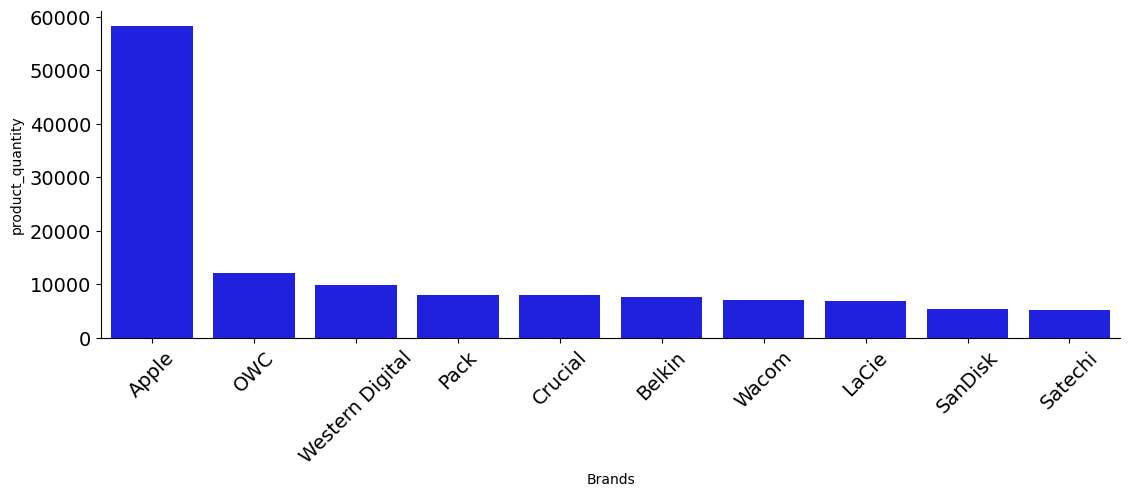

In [ ]:
#Now we can plot the graph
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(kind="bar",
            data=brands_10_most_sold_df,
            x="Brands",
            y="product_quantity",
            height=4,
            aspect=2.8,
            color = "blue");
plt.xticks(rotation =45)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

In [ ]:
grouped_df = orderlines_qu.groupby(orderlines_qu['sku'].str [:3])['product_quantity'].sum().sort_values(ascending=False).reset_index()
grouped_df.rename(columns={'sku':'short'}, inplace = True)
products_brands = grouped_df.merge(brands_qu, how = 'left', on= 'short').sort_values (by = 'product_quantity', ascending= False)
products_brands.head(10)

,short,product_quantity,long
0,APP,55118,Apple
1,OWC,12069,OWC
2,WDT,9821,Western Digital
3,PAC,8004,Pack
4,CRU,7955,Crucial
5,BEL,7659,Belkin
6,WAC,7065,Wacom
7,LAC,6787,LaCie
8,SAN,5351,SanDisk
9,SAT,5096,Satechi


In [ ]:
total_product_quantity = orderlines_brands_df['product_quantity'].sum()
print("Total Product Quantity:", total_product_quantity)


Total Product Quantity: 245811


In [ ]:
# Calculating the percentage of top 10 sailing product
filtered_top_10_brands = orderlines_brands_df.sort_values(by= 'product_quantity' , ascending=False).head(10)
total_product_quantity = orderlines_brands_df['product_quantity'].sum()
print("Total Product Quantity:", total_product_quantity)

Total Product Quantity: 245811


Product sailing percentage by product quantity brands_10_most_sold_df

In [ ]:
# Now calculate the percentage
numeric_colums = ['product_quantity']
top_10_percentage = (filtered_top_10_brands[numeric_colums].sum() / total_product_quantity) * 100

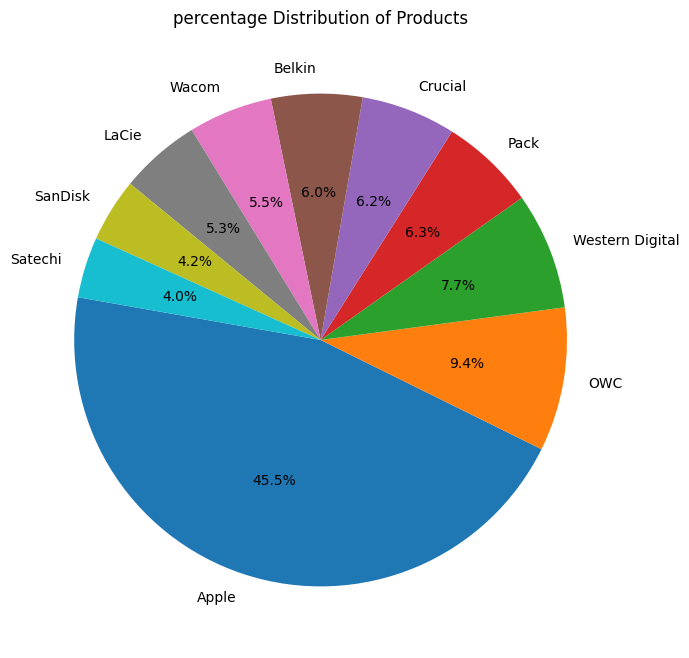

In [ ]:
# We can also use pie chart
plt.figure(figsize=(8,8))
top_10_brands_quantity = brands_10_most_sold_df['product_quantity'].head(10)
plt.pie(top_10_brands_quantity, labels=brands_10_most_sold_df['Brands'], autopct='%1.1f%%', startangle=170)
plt.title("percentage Distribution of Products")
plt.show()

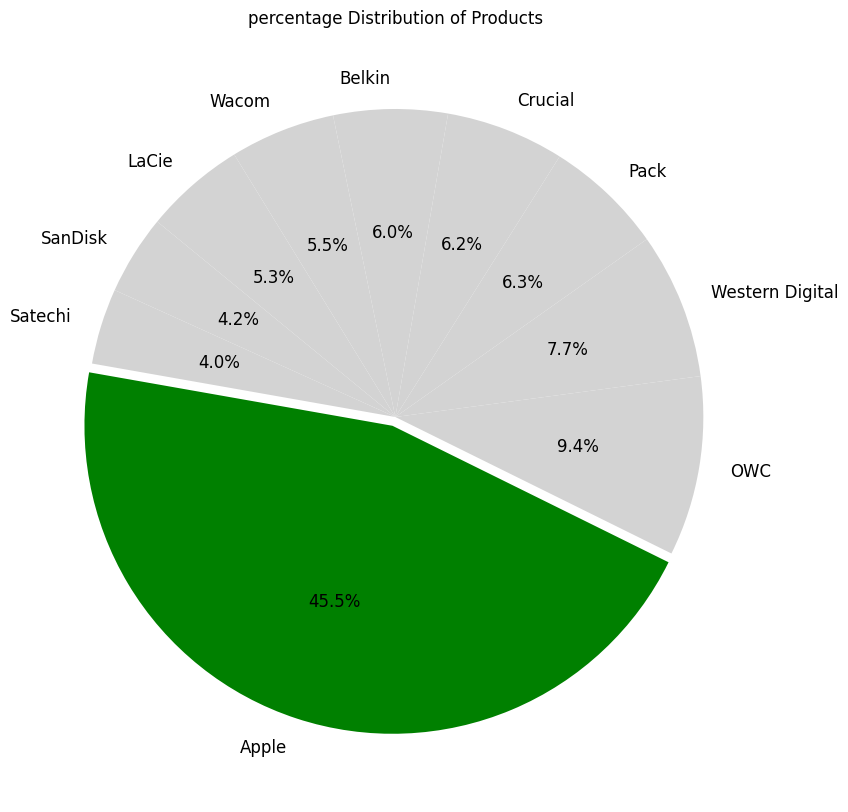

In [ ]:
# Define colors: Light gray for all, highlight Apple in red
colors = ['lightgray' if brand != 'Apple' else 'Green' for brand in brands_10_most_sold_df['Brands']]

# Define explode: Slightly separate Apple brand
explode = [0.03 if brand == 'Apple' else 0 for brand in brands_10_most_sold_df['Brands']]
plt.figure(figsize=(10, 10))
plt.pie(brands_10_most_sold_df['product_quantity'].head(10),
        labels=brands_10_most_sold_df['Brands'].head(10),
        autopct='%1.1f%%',
        startangle=170,
        colors=colors, # Apply the defined colors
        explode=explode,
        textprops={'fontsize': 12}# Apply the defined explode
       )
plt.title("percentage Distribution of Products")
plt.show()

Next we want to calculate total revenue generated by these top 10 brands

In [ ]:
# Step : Group by 'brand' and sum up total revenue
# 1 . We have to merge the prodduct_brands data with ordelines.
orderlines_qu["short"] = orderlines_qu["sku"].str[:3]
products_brands_ol_df = products_brands.merge(orderlines_qu, how = 'left', on= 'short')
products_brands_ol_df.head(5)

,short,product_quantity_x,long,id,id_order,product_id,product_quantity_y,sku,unit_price,date
0,APP,55118,Apple,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
1,APP,55118,Apple,1119140,299559,0,1,APP0700,72.19,2017-01-01 02:32:22
2,APP,55118,Apple,1119143,299559,0,1,APP1214,84.99,2017-01-01 02:36:43
3,APP,55118,Apple,1119153,299562,0,1,APP1045,9.00,2017-01-01 02:39:53
4,APP,55118,Apple,1119162,299567,0,1,APP1647,769.00,2017-01-01 03:16:51


In [ ]:
# Step : Count total revenue for
# Step - Group first group 'brand' and sum up total revenue
brands_revenue = products_brands_ol_df.groupby ("long") ["unit_price"].sum().reset_index()

In [ ]:
# Step 3: Sort by product sale (descending order)
brands_revenue = brands_revenue.sort_values(by="unit_price", ascending=False)

In [ ]:
# Revenue from top 10 brands
# Rename the 'unit_price' column to 'brands_revenue' to match the y parameter
top_10_brands = brands_10_most_sold_df.rename(columns={'brands_revenue': 'total_revenue(billion)', 'long': 'Brands'})

top_10_brands

,Brands,product_quantity
6,Apple,58210
102,OWC,12069
166,Western Digital,9821
109,Pack,8004
21,Crucial,7955
10,Belkin,7659
165,Wacom,7065
69,LaCie,6787
131,SanDisk,5351
132,Satechi,5096


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'OWC'),
  Text(2, 0, 'Western Digital'),
  Text(3, 0, 'Pack'),
  Text(4, 0, 'Crucial'),
  Text(5, 0, 'Belkin'),
  Text(6, 0, 'Wacom'),
  Text(7, 0, 'LaCie'),
  Text(8, 0, 'SanDisk'),
  Text(9, 0, 'Satechi')])

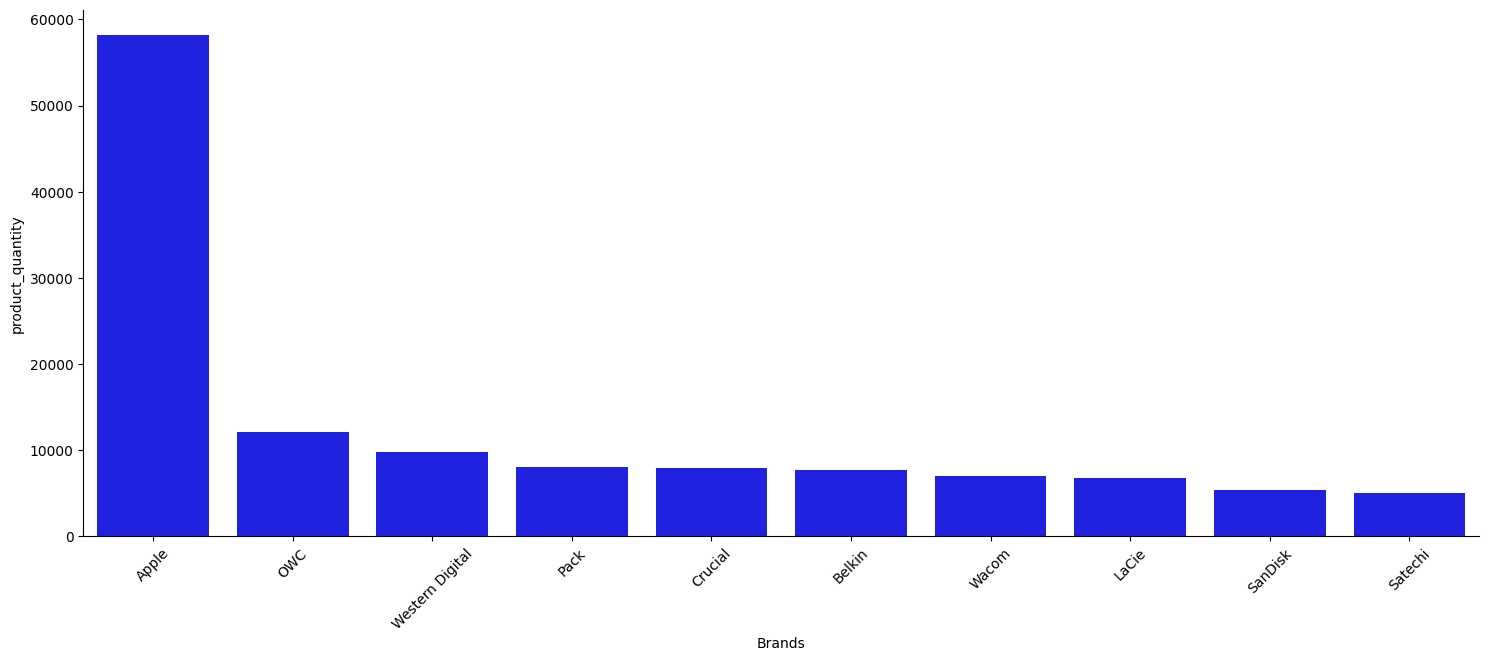

In [ ]:
# Now we can plot the graph
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(kind="bar",
            data=top_10_brands,
            x="Brands",
            y="product_quantity",
            height=6,
            aspect=2.5,
            color = "blue");
plt.xticks(rotation =45)

In [ ]:
products_brands_ol_df.head(2)


,short,product_quantity_x,long,id,id_order,product_id,product_quantity_y,sku,unit_price,date
0,APP,55118,Apple,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
1,APP,55118,Apple,1119140,299559,0,1,APP0700,72.19,2017-01-01 02:32:22


In [ ]:

#  Calculate the revenue per product
products_brands_ol_df['revnue_per_product'] = products_brands_ol_df ['product_quantity_y'] * products_brands_ol_df['unit_price']
products_brands_ol_df['revnue_per_product']

,revnue_per_product
0,72.19
1,72.19
2,84.99
3,9.00
4,769.00
...,...
216245,43.88
216246,709.99
216247,404.99
216248,142.11


In [ ]:
#  Calculate the Total revenue
total_revnue = products_brands_ol_df['revnue_per_product'].sum()
print(f"Total Revnue: ${total_revnue}")


Total Revnue: $39122248.12


Once we have total revenue then we can calculate percentage of top 10 brands

In [ ]:
# Now we can calculate the percentage. first we have to broup the data frame
brands_revnue = products_brands_ol_df.groupby ("long") ["unit_price"].sum().reset_index()

In [ ]:
# Step 3: Sort by product sale (descending order)
brands_revnue = brands_revenue.sort_values(by="unit_price", ascending=False)

In [ ]:
# Revenue from top 10 brands
# Rename the 'unit_price' column to 'brands_revenue' to match the by parameter
top_10_brands = brands_revenue.head(10).copy()
top_10_brands = top_10_brands.rename(columns={'unit_price': 'total_revnue(billion)', 'long': 'Brands'})

top_10_brands.head(2)

,Brands,total_revnue(billion)
6,Apple,16844258.95
109,Pack,2357725.49


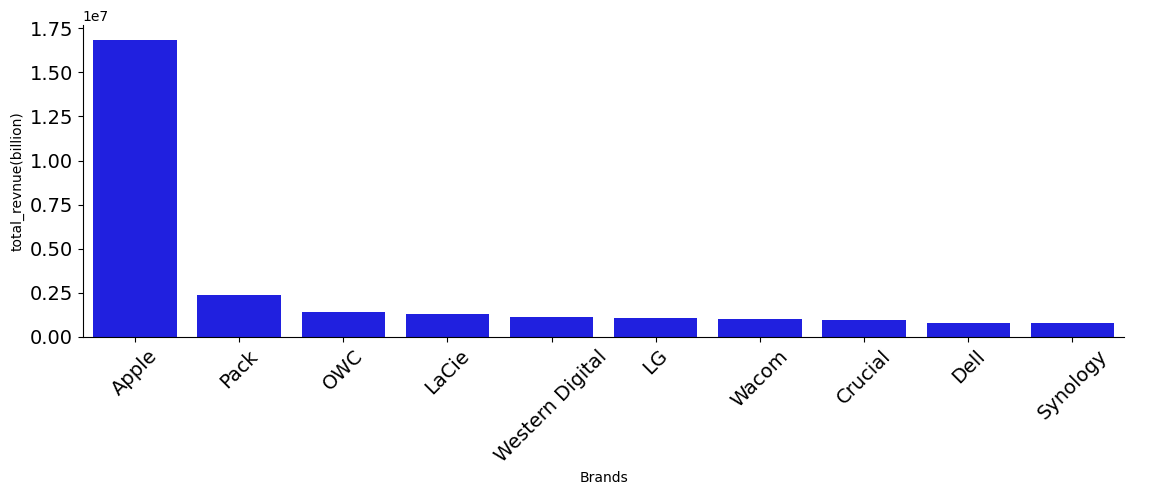

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(kind="bar",
            data=top_10_brands,
            x="Brands",
            y="total_revnue(billion)",
            height=4,
            aspect=2.8,
            color = "blue");
plt.xticks(rotation =45)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

In [ ]:
# Finally we can calculate the percentage
total_revnue = products_brands_ol_df['revnue_per_product'].sum()
print(f"Total Revnue: ${total_revnue}")
top_10_brands['percentage share'] = (top_10_brands['total_revnue(billion)'])/total_revnue*100

Total Revnue: $39122248.12


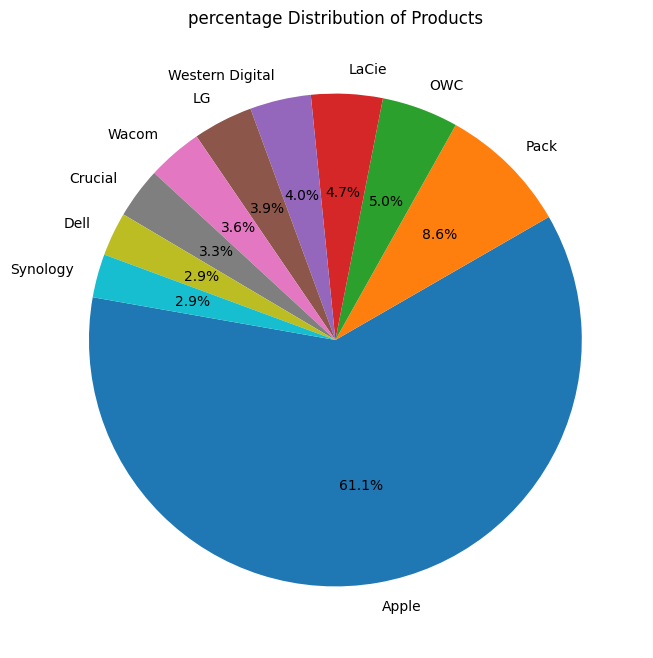

In [ ]:
# We can also use pie chart
plt.figure(figsize=(8,8))
plt.pie(top_10_brands['percentage share'], labels=top_10_brands['Brands'], autopct='%1.1f%%', startangle=170)
plt.title("percentage Distribution of Products")
plt.show()

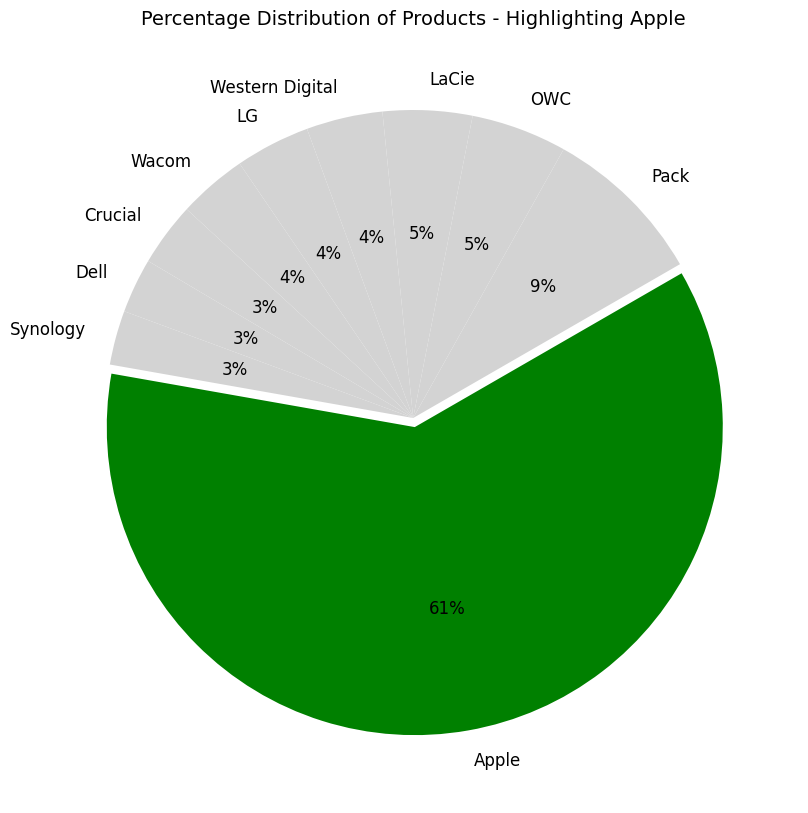

In [ ]:
# I want to see which products from Apple sailing the most
# Define colors: Light gray for all, highlight Apple in red
colors = ['lightgray' if brand != 'Apple' else 'Green' for brand in top_10_brands['Brands']]

# Define explode: Slightly separate Apple brand
explode = [0.03 if brand == 'Apple' else 0 for brand in top_10_brands['Brands']]
plt.figure(figsize=(10, 10))
plt.pie(top_10_brands['total_revnue(billion)'].head(10),
        labels=top_10_brands['Brands'].head(10),
        autopct='%1.0f%%',
        startangle=170,
        colors=colors, # Apply the defined colors
        explode=explode,
        textprops={'fontsize': 12} # Apply the defined explode
       )
plt.title("Percentage Distribution of Products - Highlighting Apple", fontsize=14)
plt.show()